<h1 align="center"> 
DATS 6501 —Capstone Project (Part III)
</h1> 

<h1 align="center"> 
Olympic Games Analysis — Machine Learning Continued
</h1> 

<h4 align="center"> 
Author: Xiaochi Ge ([gexiaochi@gwu.edu](mailto:gexiaochi@gwu.edu))
</h4>

## 1. Import Packagea & Read Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
athletes = pd.read_csv('athlete_events.csv')
regions = pd.read_csv('noc_regions.csv')
olympic_data = pd.merge(athletes, regions, on='NOC', how='left')

In [3]:
olympic = olympic_data[['Sex','Age','Height','Weight','NOC','Sport','Medal']]
#olympic.head()

## 2. Fill-in Missing Data

In [4]:
olympic['Medal'].fillna(('Lose'), inplace=True)
olympic['Age'].fillna((olympic['Age'].median()), inplace=True)
olympic['Height'].fillna((olympic['Height'].median()), inplace=True)
olympic['Weight'].fillna((olympic['Weight'].median()), inplace=True)
olympic.head()

/Users/apple/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,Sex,Age,Height,Weight,NOC,Sport,Medal
0,M,24.0,180.0,80.0,CHN,Basketball,Lose
1,M,23.0,170.0,60.0,CHN,Judo,Lose
2,M,24.0,175.0,70.0,DEN,Football,Lose
3,M,34.0,175.0,70.0,DEN,Tug-Of-War,Gold
4,F,21.0,185.0,82.0,NED,Speed Skating,Lose


In [5]:
#If medals = Gold,Silver,and Bronze, change it to Win; Otherwise, Lose
def medal(olympic):
    if (olympic['Medal'] == 'Gold'):
        return 'Win'
    elif (olympic['Medal'] == 'Silver'):
        return 'Win'
    elif (olympic['Medal'] == 'Bronze'):
        return 'Win'
    else:
        return 'Lose'

In [6]:
olympic['Medal'] = olympic.apply(medal, axis=1)
olympic.head()

/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Sex,Age,Height,Weight,NOC,Sport,Medal
0,M,24.0,180.0,80.0,CHN,Basketball,Lose
1,M,23.0,170.0,60.0,CHN,Judo,Lose
2,M,24.0,175.0,70.0,DEN,Football,Lose
3,M,34.0,175.0,70.0,DEN,Tug-Of-War,Win
4,F,21.0,185.0,82.0,NED,Speed Skating,Lose


## 3. Mapping Construction

In [7]:
# construct medal mapping
# to convert class labels from strings to integers
#medal_mapping = {label: idx for idx, label in enumerate(np.unique(olympic['Medal']))}
#medal_mapping = {'Lose': -1,'Bronze': 0,'Silver': 1,'Gold':2}
medal_mapping = {'Lose': -1,'Win': 1}
medal_mapping

{'Lose': -1, 'Win': 1}

In [8]:
# construct medal mapping
# to convert class labels from strings to integers
#medal_mapping = {label: idx for idx, label in enumerate(np.unique(olympic['Medal']))}
#medal_mapping = {'No_Medal': -1,'Bronze': 0,'Silver': 1,'Gold':2}
#medal_mapping = {'Bronze': 0,'Silver': 1,'Gold':2}
#medal_mapping

In [9]:
# construct NOC mapping
NOC_mapping = {label: idx for idx, label in enumerate(np.unique(olympic['NOC']))}
NOC_mapping

{'AFG': 0,
 'AHO': 1,
 'ALB': 2,
 'ALG': 3,
 'AND': 4,
 'ANG': 5,
 'ANT': 6,
 'ANZ': 7,
 'ARG': 8,
 'ARM': 9,
 'ARU': 10,
 'ASA': 11,
 'AUS': 12,
 'AUT': 13,
 'AZE': 14,
 'BAH': 15,
 'BAN': 16,
 'BAR': 17,
 'BDI': 18,
 'BEL': 19,
 'BEN': 20,
 'BER': 21,
 'BHU': 22,
 'BIH': 23,
 'BIZ': 24,
 'BLR': 25,
 'BOH': 26,
 'BOL': 27,
 'BOT': 28,
 'BRA': 29,
 'BRN': 30,
 'BRU': 31,
 'BUL': 32,
 'BUR': 33,
 'CAF': 34,
 'CAM': 35,
 'CAN': 36,
 'CAY': 37,
 'CGO': 38,
 'CHA': 39,
 'CHI': 40,
 'CHN': 41,
 'CIV': 42,
 'CMR': 43,
 'COD': 44,
 'COK': 45,
 'COL': 46,
 'COM': 47,
 'CPV': 48,
 'CRC': 49,
 'CRO': 50,
 'CRT': 51,
 'CUB': 52,
 'CYP': 53,
 'CZE': 54,
 'DEN': 55,
 'DJI': 56,
 'DMA': 57,
 'DOM': 58,
 'ECU': 59,
 'EGY': 60,
 'ERI': 61,
 'ESA': 62,
 'ESP': 63,
 'EST': 64,
 'ETH': 65,
 'EUN': 66,
 'FIJ': 67,
 'FIN': 68,
 'FRA': 69,
 'FRG': 70,
 'FSM': 71,
 'GAB': 72,
 'GAM': 73,
 'GBR': 74,
 'GBS': 75,
 'GDR': 76,
 'GEO': 77,
 'GEQ': 78,
 'GER': 79,
 'GHA': 80,
 'GRE': 81,
 'GRN': 82,
 'GUA': 83,
 '

In [10]:
# construct sports mapping
sport_mapping = {label: idx for idx, label in enumerate(np.unique(olympic['Sport']))}
sport_mapping

{'Aeronautics': 0,
 'Alpine Skiing': 1,
 'Alpinism': 2,
 'Archery': 3,
 'Art Competitions': 4,
 'Athletics': 5,
 'Badminton': 6,
 'Baseball': 7,
 'Basketball': 8,
 'Basque Pelota': 9,
 'Beach Volleyball': 10,
 'Biathlon': 11,
 'Bobsleigh': 12,
 'Boxing': 13,
 'Canoeing': 14,
 'Cricket': 15,
 'Croquet': 16,
 'Cross Country Skiing': 17,
 'Curling': 18,
 'Cycling': 19,
 'Diving': 20,
 'Equestrianism': 21,
 'Fencing': 22,
 'Figure Skating': 23,
 'Football': 24,
 'Freestyle Skiing': 25,
 'Golf': 26,
 'Gymnastics': 27,
 'Handball': 28,
 'Hockey': 29,
 'Ice Hockey': 30,
 'Jeu De Paume': 31,
 'Judo': 32,
 'Lacrosse': 33,
 'Luge': 34,
 'Military Ski Patrol': 35,
 'Modern Pentathlon': 36,
 'Motorboating': 37,
 'Nordic Combined': 38,
 'Polo': 39,
 'Racquets': 40,
 'Rhythmic Gymnastics': 41,
 'Roque': 42,
 'Rowing': 43,
 'Rugby': 44,
 'Rugby Sevens': 45,
 'Sailing': 46,
 'Shooting': 47,
 'Short Track Speed Skating': 48,
 'Skeleton': 49,
 'Ski Jumping': 50,
 'Snowboarding': 51,
 'Softball': 52,
 'S

In [11]:
olympic['Medal'] = olympic['Medal'].map(medal_mapping)
olympic['Sport'] = olympic['Sport'].map(sport_mapping)
olympic['NOC'] = olympic['NOC'].map(NOC_mapping)
olympic.head()

/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

,Sex,Age,Height,Weight,NOC,Sport,Medal
0,M,24.0,180.0,80.0,41,8,-1
1,M,23.0,170.0,60.0,41,32,-1
2,M,24.0,175.0,70.0,55,24,-1
3,M,34.0,175.0,70.0,55,61,1
4,F,21.0,185.0,82.0,145,53,-1


## 4. Female Athelets

In [12]:
#get female data
olympic_F = olympic[(olympic.Sex=='F')]
olympic_F.head(10)

,Sex,Age,Height,Weight,NOC,Sport,Medal
4,F,21.0,185.0,82.0,145,53,-1
5,F,21.0,185.0,82.0,145,53,-1
6,F,25.0,185.0,82.0,145,53,-1
7,F,25.0,185.0,82.0,145,53,-1
8,F,27.0,185.0,82.0,145,53,-1
9,F,27.0,185.0,82.0,145,53,-1
26,F,18.0,168.0,70.0,145,5,-1
27,F,18.0,168.0,70.0,145,5,-1
32,F,30.0,159.0,55.5,68,46,-1
33,F,34.0,159.0,55.5,68,46,-1


In [13]:
olympic_F.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74522 entries, 4 to 271110
Data columns (total 7 columns):
Sex       74522 non-null object
Age       74522 non-null float64
Height    74522 non-null float64
Weight    74522 non-null float64
NOC       74522 non-null int64
Sport     74522 non-null int64
Medal     74522 non-null int64
dtypes: float64(3), int64(3), object(1)
memory usage: 4.5+ MB


##  (a). Female Data Correlation

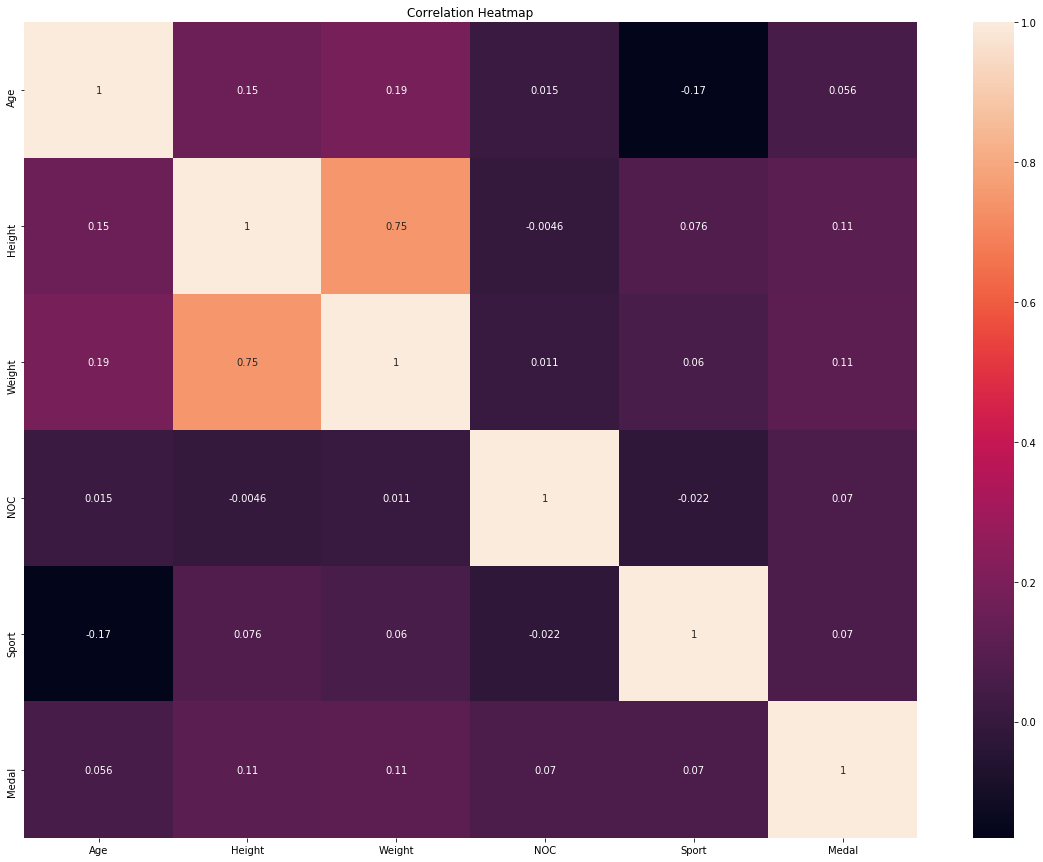

In [14]:
#draw a heatmap to check the correlation between each variable
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Correlation Heatmap")
corr = olympic_F.corr()
sns.heatmap(corr, annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

## （b). Train_Test Split

In [15]:
from sklearn.model_selection import train_test_split
Xf = olympic_F.iloc[:,1:6]
yf = olympic_F.iloc[:,6]
yf = yf.reshape(74522)
#Xf_train, Xf_test, yf_train, yf_test = train_test_split(Xf, yf, test_size=0.3, random_state=1, stratify=yf)
Xf_train, Xf_test, yf_train, yf_test = train_test_split(Xf,yf,test_size=0.33, random_state=42)

/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


## （c). RandomForest

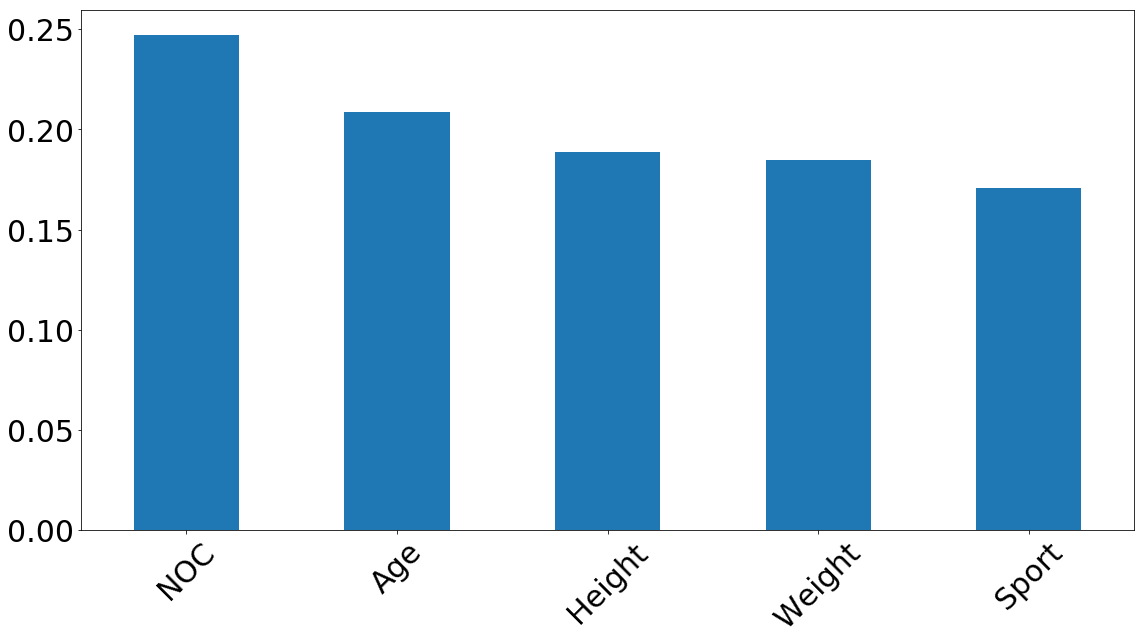

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

scores = []

# Declare and train the model
clf = RandomForestClassifier(random_state = 0,n_estimators=25, n_jobs = 2)
clf.fit(Xf_train, yf_train)
yf_pred_RandomForestClassifier = clf.predict(Xf_test)
#Get Accuracy Score
score = accuracy_score(yf_pred_RandomForestClassifier,yf_test)
scores.append(score)

global importances
# Get the feature importances
importances = []
importances = clf.feature_importances_


# Convert the importances into one-dimensional 1darray with corresponding df column names as axis labels
f_importances = pd.Series(importances, Xf.columns)

# Sort the array in descending order of the importances
f_importances.sort_values(ascending=False, inplace=True)

# Make the bar Plot from f_importances 
f_importances.plot(x='Features', y='Importance', kind='bar', figsize=(16,9), rot=45, fontsize=30)

# Show the plot
plt.tight_layout()
plt.show()

In [17]:
#Get cross validation score of random forest model
from sklearn.model_selection import cross_val_score
cv_scores = []

score_forest=cross_val_score(clf, Xf,yf, cv=10)
score_forest
print("Random Forest Accuracy: %0.2f (+/- %0.2f)" % (score_forest.mean(), score_forest.std() * 2))
cv_score = score_forest.mean()
cv_scores.append(cv_score)

Random Forest Accuracy: 0.85 (+/- 0.01)


In [18]:
from sklearn.metrics import classification_report
yf_predict = clf.predict(Xf_test)
print(classification_report(yf_test, yf_predict))

             precision    recall  f1-score   support

         -1       0.89      0.95      0.92     20879
          1       0.56      0.37      0.45      3714

avg / total       0.84      0.86      0.85     24593



## (d). KNN

In [19]:
from sklearn.neighbors import KNeighborsClassifier
# Declare the model
clf = KNeighborsClassifier(n_neighbors=5)

# Train the model
clf.fit(Xf_train, yf_train)
yf_pred_KNeighborsClassifier = clf.predict(Xf_test)
#Get Accuracy Score
score = accuracy_score(yf_pred_KNeighborsClassifier,yf_test)
scores.append(score)

In [20]:
#Get cross validation score of K-Nearest Neighbors
score_knn=cross_val_score(clf, Xf,yf, cv=10)
print("K-Nearest Neighbors Acuracy: %0.2f (+/- %0.2f)" % (score_knn.mean(), score_knn.std() * 2))
cv_score = score_knn.mean()
cv_scores.append(cv_score)

K-Nearest Neighbors Acuracy: 0.83 (+/- 0.01)


In [21]:
from sklearn.metrics import classification_report
yf_predict = clf.predict(Xf_test)
print(classification_report(yf_test, yf_predict))

             precision    recall  f1-score   support

         -1       0.88      0.95      0.91     20879
          1       0.49      0.29      0.37      3714

avg / total       0.82      0.85      0.83     24593



## （e). Perceptron

In [22]:
from sklearn.linear_model import Perceptron

# Declare the model
clf = Perceptron(n_iter=40, eta0=0.1, random_state=0)

# Train the model
clf.fit(Xf_train, yf_train)
yf_pred_Perceptron = clf.predict(Xf_test)
#Get Accuracy Score
score = accuracy_score(yf_pred_Perceptron,yf_test)
scores.append(score)

/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


In [23]:
#Get cross validation score of Perceptron
score_Perceptron=cross_val_score(clf, Xf,yf, cv=10)
score_Perceptron
print("Perceptron Accuracy: %0.2f (+/- %0.2f)" % (score_Perceptron.mean(), score_Perceptron.std() * 2))
cv_score = score_Perceptron.mean()
cv_scores.append(cv_score)

/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/apple/anaconda3/lib/python3.6/sit

Perceptron Accuracy: 0.81 (+/- 0.16)


In [24]:
from sklearn.metrics import classification_report
yf_predict = clf.predict(Xf_test)
print(classification_report(yf_test, yf_predict))

             precision    recall  f1-score   support

         -1       0.86      0.82      0.84     20879
          1       0.19      0.23      0.20      3714

avg / total       0.76      0.73      0.74     24593



## (f). DecisionTree

In [25]:
from sklearn.tree import DecisionTreeClassifier

# Declare the model
clf = DecisionTreeClassifier()

#Training the Model
clf.fit(Xf_train,yf_train)
yf_pred_DecisionTree = clf.predict(Xf_test)

#Get Accuracy Score
score = accuracy_score(yf_pred_DecisionTree,yf_test)
scores.append(score)

In [26]:
#Get cross validation score of DecisionTree
score_DecisionTree=cross_val_score(clf, Xf,yf, cv=10)
print("DecisionTree Accuracy: %0.2f (+/- %0.2f)" % (score_DecisionTree.mean(), score_DecisionTree.std() * 2))
cv_score = score_DecisionTree.mean()
cv_scores.append(cv_score)

DecisionTree Accuracy: 0.82 (+/- 0.02)


In [27]:
from sklearn.metrics import classification_report
yf_predict = clf.predict(Xf_test)
print(classification_report(yf_test, yf_predict))

             precision    recall  f1-score   support

         -1       0.90      0.91      0.90     20879
          1       0.45      0.43      0.44      3714

avg / total       0.83      0.84      0.83     24593



## (g). Compare Algorithms
### Accuracy Score

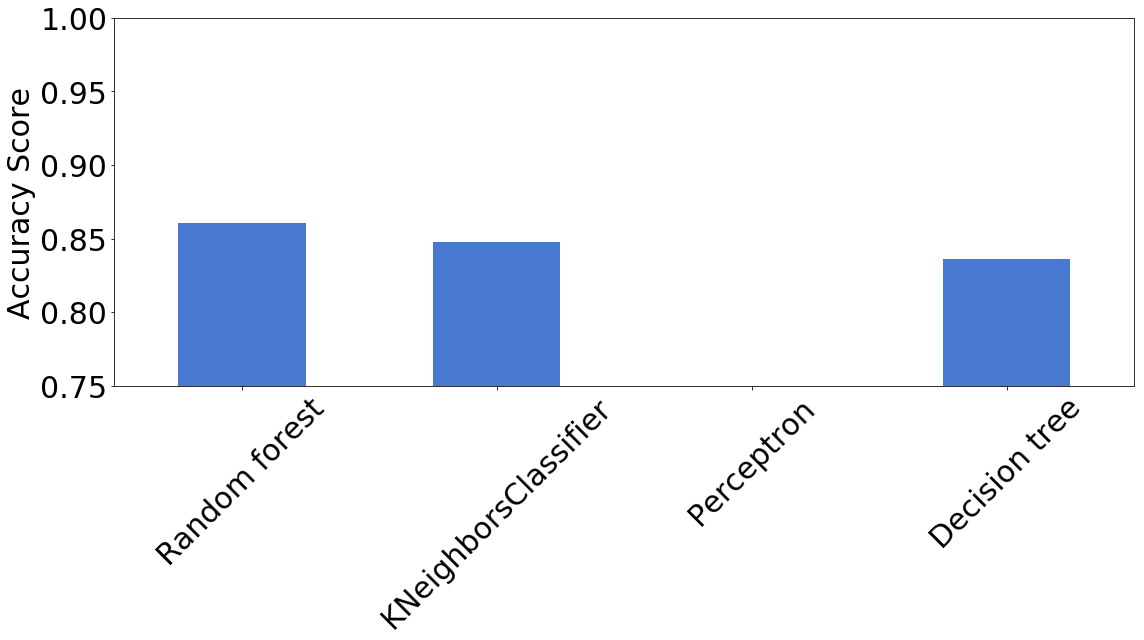

In [28]:
from matplotlib.colors import ListedColormap

#Compare model among female data
#Convert the Accuracy Scores into one-dimensional 1darray with corresponding classifier names as axis labels

Acc_scores = pd.Series(scores, ['Random forest','KNeighborsClassifier','Perceptron','Decision tree'])

current_palette = sns.color_palette("muted", n_colors=4)
cmap = ListedColormap(sns.color_palette(current_palette).as_hex())

# Make the bar Plot from f_importances 
Acc_scores.plot(x='Classifiers', y='Accuracy scores',kind = 'bar',figsize=(16,9), rot=45, fontsize=30, colormap=cmap)

plt.xlabel('', fontsize=30)
plt.ylabel('Accuracy Score', fontsize=30)
plt.ylim([0.75,1])
# Show the plot
plt.tight_layout()
plt.show()

### Cross Validation Scores

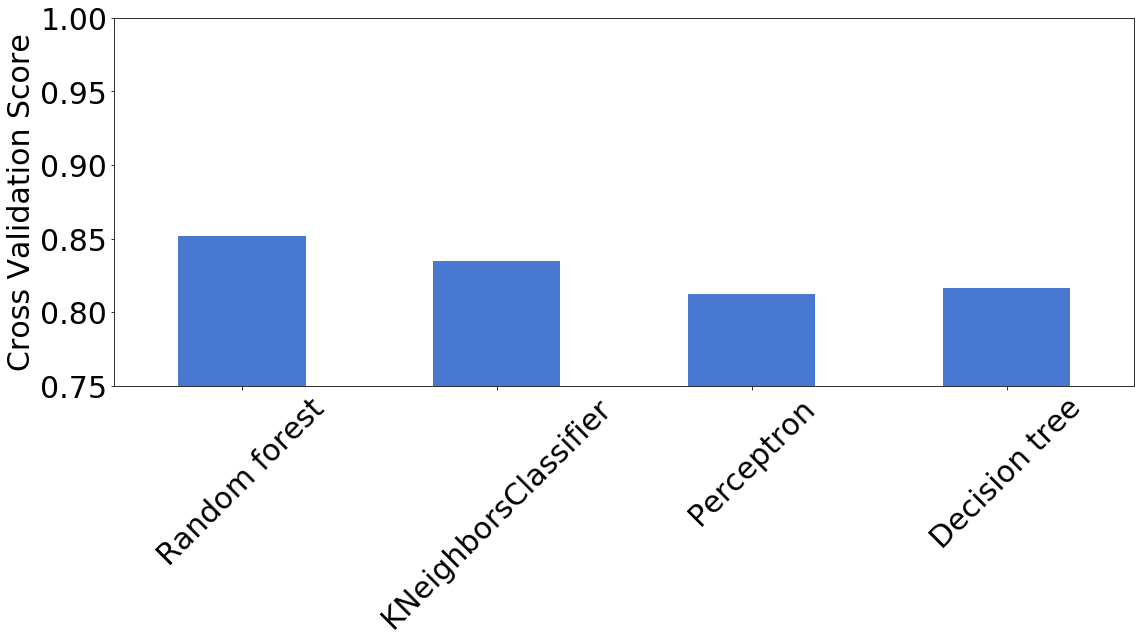

In [29]:
# Convert the Cross Validation scores into one-dimensional 1darray with corresponding classifier names as axis labels

clf_scores = pd.Series(cv_scores, ['Random forest','KNeighborsClassifier','Perceptron','Decision tree'])

current_palette = sns.color_palette("muted", n_colors=4)
cmap = ListedColormap(sns.color_palette(current_palette).as_hex())

# Make the bar Plot from f_importances 
clf_scores.plot(x='Classifiers', y='Cross Validation scores',kind = 'bar',figsize=(16,9), 
                rot=45, fontsize=30, colormap=cmap)
#plt.bar(fscores,clfs)
plt.xlabel('', fontsize=30)
plt.ylabel('Cross Validation Score', fontsize=30)
plt.ylim([0.75,1])
# Show the plot
plt.tight_layout()
plt.show()                      

# 5. Male Athelets

In [30]:
#get male data
olympic_M = olympic[(olympic.Sex=='M')]
olympic_M.head()

,Sex,Age,Height,Weight,NOC,Sport,Medal
0,M,24.0,180.0,80.0,41,8,-1
1,M,23.0,170.0,60.0,41,32,-1
2,M,24.0,175.0,70.0,55,24,-1
3,M,34.0,175.0,70.0,55,61,1
10,M,31.0,188.0,75.0,216,17,-1


In [31]:
olympic_M.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196594 entries, 0 to 271115
Data columns (total 7 columns):
Sex       196594 non-null object
Age       196594 non-null float64
Height    196594 non-null float64
Weight    196594 non-null float64
NOC       196594 non-null int64
Sport     196594 non-null int64
Medal     196594 non-null int64
dtypes: float64(3), int64(3), object(1)
memory usage: 12.0+ MB


## (a). Male Correlation

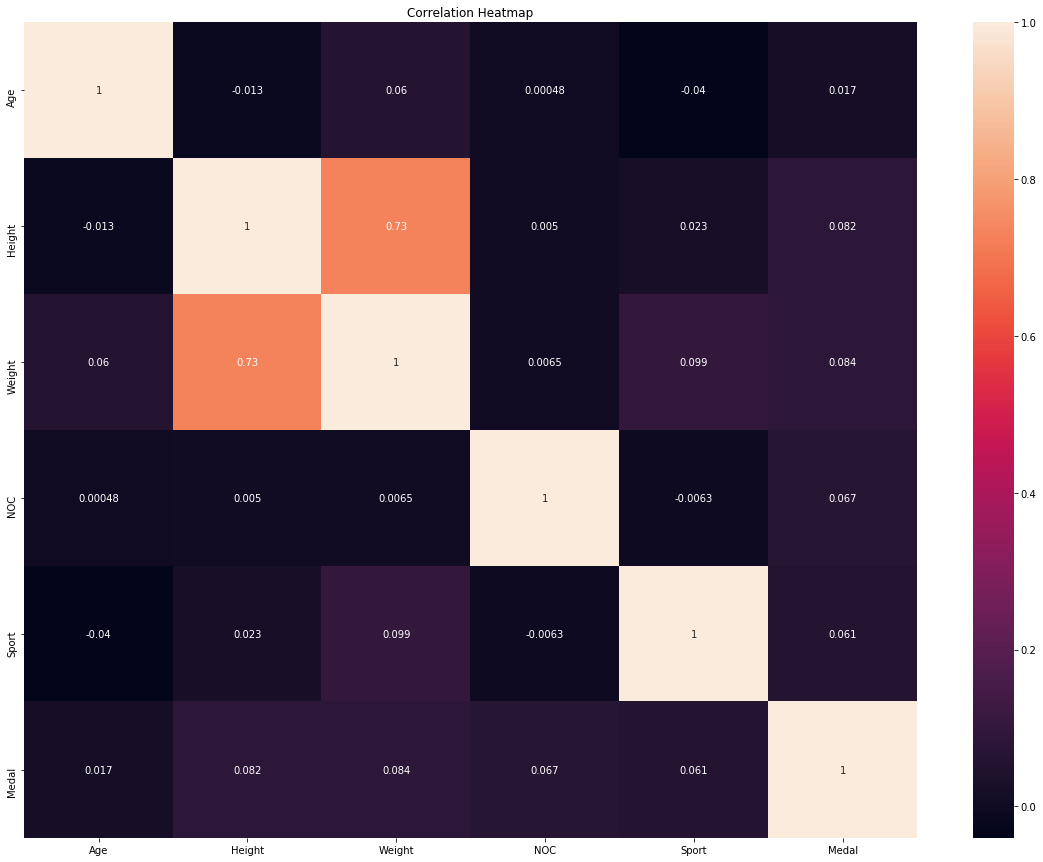

In [32]:
#draw a heatmap to check the correlation between each variable
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Correlation Heatmap")
corr_m = olympic_M.corr()
sns.heatmap(corr_m, annot=True,
            xticklabels=corr_m.columns.values,
            yticklabels=corr_m.columns.values)
plt.show()

## (b). Train_Test Split

In [33]:
from sklearn.model_selection import train_test_split
Xm = olympic_M.iloc[:,1:6]
ym = olympic_M.iloc[:,6]
ym = ym.reshape(196594)
Xm_train, Xm_test, ym_train, ym_test = train_test_split(Xm,ym,test_size=0.33, random_state=42)

/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


## (c). RandomForest

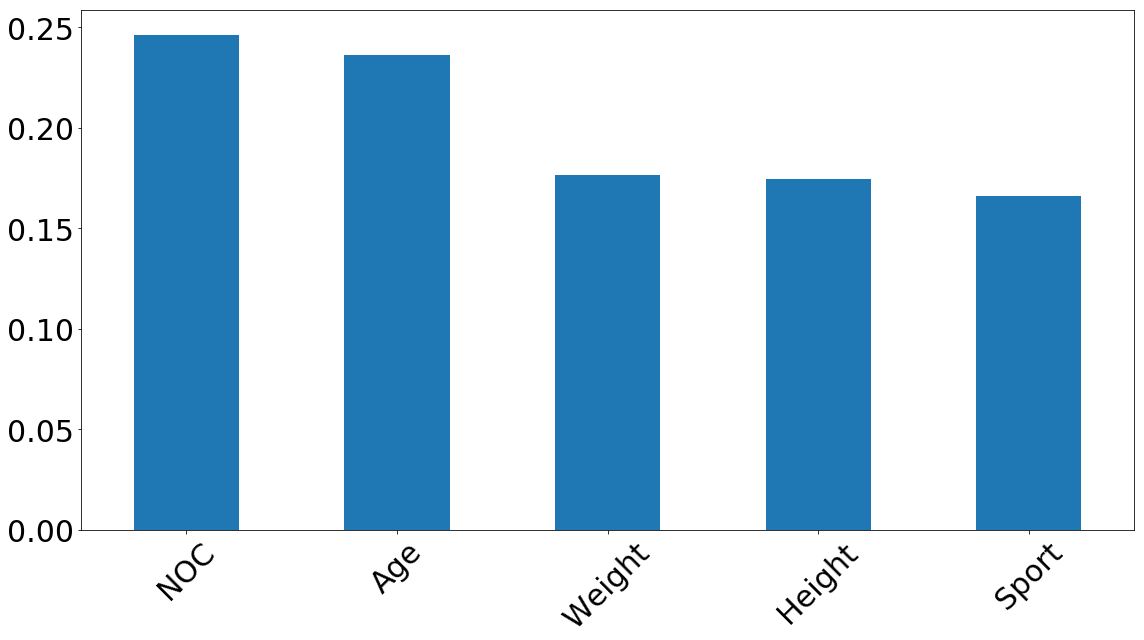

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

scores_m = []

# Declare and train the model
clf_m = RandomForestClassifier(random_state = 0,n_estimators=25, n_jobs = 2)
clf_m.fit(Xm_train, ym_train)
ym_pred_RandomForestClassifier = clf_m.predict(Xm_test)
#Get Accuracy Score
score_m = accuracy_score(ym_pred_RandomForestClassifier,ym_test)
scores_m.append(score_m)

global importances
# Get the feature importances
importances_m = []
importances_m = clf_m.feature_importances_


# Convert the importances into one-dimensional 1darray with corresponding df column names as axis labels
f_importances_m = pd.Series(importances_m, Xm.columns)

# Sort the array in descending order of the importances
f_importances_m.sort_values(ascending=False, inplace=True)

# Make the bar Plot from f_importances 
f_importances_m.plot(x='Features', y='Importance', kind='bar', figsize=(16,9), rot=45, fontsize=30)

# Show the plot
plt.tight_layout()
plt.show()

In [35]:
#Get cross validation score of random forest model
from sklearn.model_selection import cross_val_score
cv_scores_m = []

score_forest_m=cross_val_score(clf_m, Xm,ym, cv=10)
score_forest_m
print("Random Forest Accuracy: %0.2f (+/- %0.2f)" % (score_forest_m.mean(), score_forest_m.std() * 2))
cv_score_m = score_forest_m.mean()
cv_scores_m.append(cv_score_m)

Random Forest Accuracy: 0.86 (+/- 0.01)


In [36]:
from sklearn.metrics import classification_report
ym_predict = clf_m.predict(Xm_test)
print(classification_report(ym_test, ym_predict))

             precision    recall  f1-score   support

         -1       0.89      0.95      0.92     55433
          1       0.52      0.32      0.40      9444

avg / total       0.84      0.86      0.84     64877



## (d). KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier
# Declare the model
clf_m = KNeighborsClassifier(n_neighbors=5)

# Train the model
clf_m.fit(Xm_train, ym_train)
ym_pred_KNeighborsClassifier = clf_m.predict(Xm_test)
#Get Accuracy Score
score_m = accuracy_score(ym_pred_KNeighborsClassifier,ym_test)
scores_m.append(score_m)

In [38]:
#Get cross validation score of K-Nearest Neighbors
score_knn_m=cross_val_score(clf_m, Xm,ym, cv=10)
print("K-Nearest Neighbors Acuracy: %0.2f (+/- %0.2f)" % (score_knn_m.mean(), score_knn_m.std() * 2))
cv_score_m = score_knn_m.mean()
cv_scores_m.append(cv_score_m)

K-Nearest Neighbors Acuracy: 0.84 (+/- 0.00)


In [39]:
from sklearn.metrics import classification_report
ym_predict = clf_m.predict(Xm_test)
print(classification_report(ym_test, ym_predict))

             precision    recall  f1-score   support

         -1       0.88      0.95      0.91     55433
          1       0.46      0.26      0.33      9444

avg / total       0.82      0.85      0.83     64877



## (e). Perceptron

In [40]:
from sklearn.linear_model import Perceptron

# Declare the model
clf_m = Perceptron(n_iter=40, eta0=0.1, random_state=0)

# Train the model
clf_m.fit(Xm_train, ym_train)
ym_pred_Perceptron = clf_m.predict(Xm_test)
#Get Accuracy Score
score_m = accuracy_score(ym_pred_Perceptron,ym_test)
scores_m.append(score_m)

/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


In [41]:
#Get cross validation score of Perceptron
score_perceptron_m=cross_val_score(clf_m, Xm,ym, cv=10)
score_perceptron_m
print("Perceptron Accuracy: %0.2f (+/- %0.2f)" % (score_perceptron_m.mean(), score_perceptron_m.std() * 2))
cv_score_m = score_perceptron_m.mean()
cv_scores_m.append(cv_score_m)

/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/apple/anaconda3/lib/python3.6/sit

Perceptron Accuracy: 0.84 (+/- 0.06)


In [42]:
from sklearn.metrics import classification_report
ym_predict = clf_m.predict(Xm_test)
print(classification_report(ym_test, ym_predict))

             precision    recall  f1-score   support

         -1       0.85      1.00      0.92     55433
          1       0.00      0.00      0.00      9444

avg / total       0.73      0.85      0.79     64877



/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## (f). DecisionTree

In [43]:
from sklearn.tree import DecisionTreeClassifier

# Declare the model
clf_m = DecisionTreeClassifier()

#Training the Model
clf_m.fit(Xm_train,ym_train)
ym_pred_DecisionTree = clf_m.predict(Xm_test)

#Get Accuracy Score
score_m = accuracy_score(ym_pred_DecisionTree,ym_test)
scores_m.append(score_m)

In [44]:
#Get cross validation score of DecisionTree
score_DecisionTree_m=cross_val_score(clf_m, Xm,ym, cv=10)
print("DecisionTree Accuracy: %0.2f (+/- %0.2f)" % (score_DecisionTree_m.mean(), score_DecisionTree_m.std() * 2))
cv_score_m = score_DecisionTree_m.mean()
cv_scores_m.append(cv_score_m)

DecisionTree Accuracy: 0.82 (+/- 0.01)


In [45]:
from sklearn.metrics import classification_report
ym_predict = clf_m.predict(Xm_test)
print(classification_report(ym_test, ym_predict))

             precision    recall  f1-score   support

         -1       0.90      0.92      0.91     55433
          1       0.43      0.37      0.40      9444

avg / total       0.83      0.84      0.83     64877



## (g). Compare Algorithms
### Accuracy Score

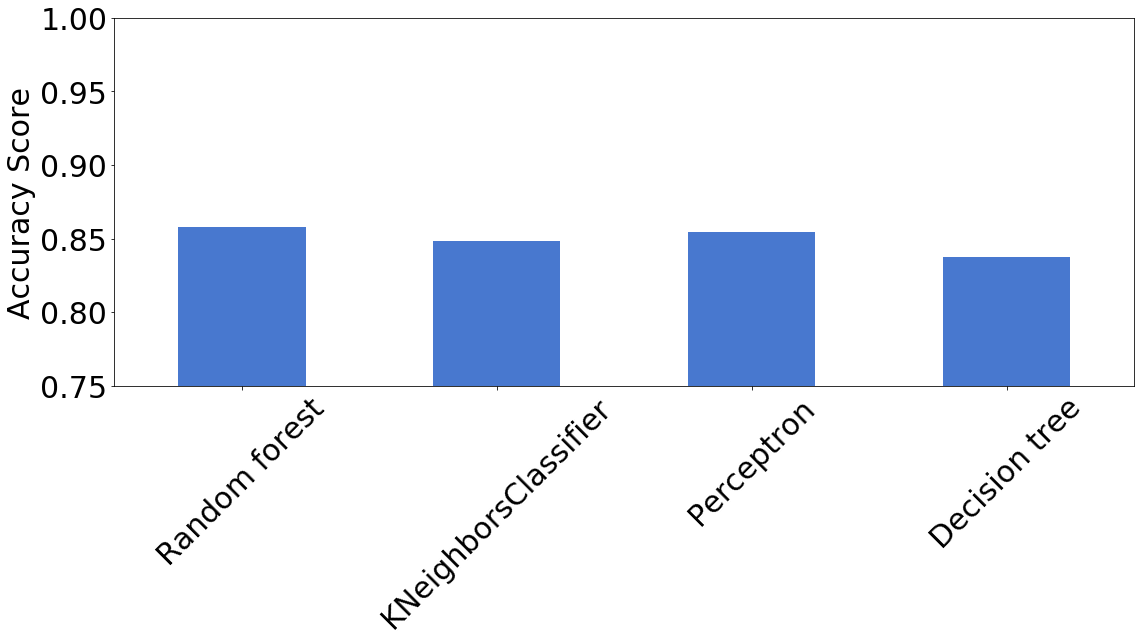

In [46]:
from matplotlib.colors import ListedColormap

#Compare model among female data
#Convert the Accuracy Scores into one-dimensional 1darray with corresponding classifier names as axis labels

Acc_scores_m = pd.Series(scores_m, ['Random forest','KNeighborsClassifier','Perceptron','Decision tree'])

current_palette_m = sns.color_palette("muted", n_colors=5)
cmap_m = ListedColormap(sns.color_palette(current_palette_m).as_hex())
#colors = np.random.randint(0,5,5)

# Make the bar Plot from f_importances 
Acc_scores_m.plot(x='Classifiers', y='Accuracy scores',kind = 'bar',figsize=(16,9), rot=45, fontsize=30, colormap=cmap)
#plt.bar(fscores,clfs)
plt.xlabel('', fontsize=30)
plt.ylabel('Accuracy Score', fontsize=30)
plt.ylim([0.75,1])
# Show the plot
plt.tight_layout()
plt.show()

### Cross Validation Scores

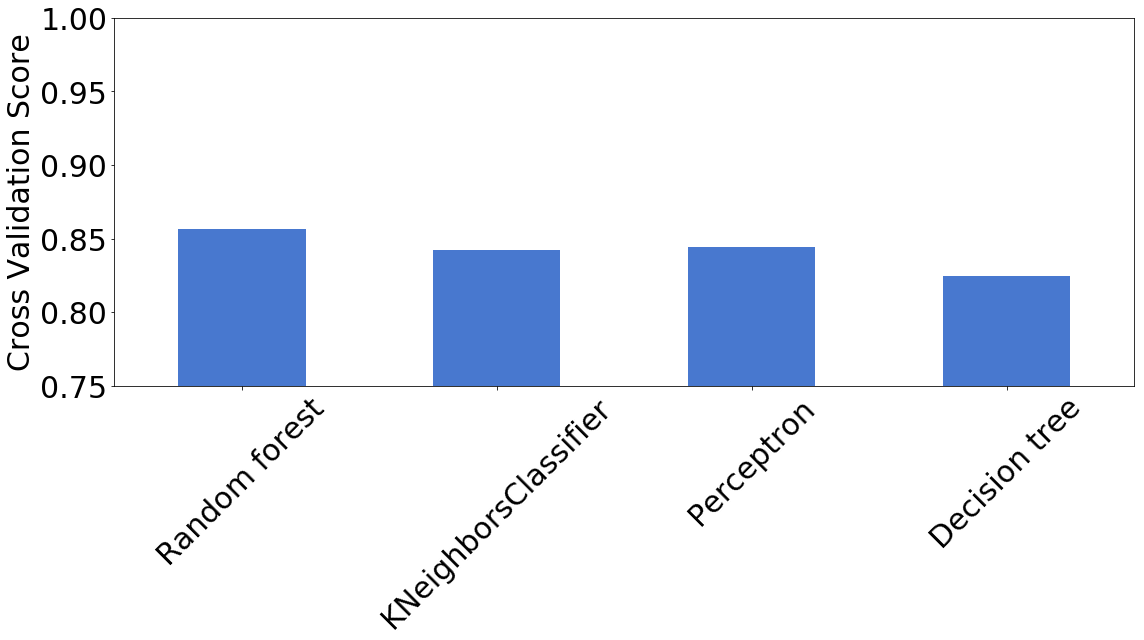

In [47]:
# Convert the Cross Validation scores into one-dimensional 1darray with corresponding classifier names as axis labels

clf_scores_m = pd.Series(cv_scores_m, ['Random forest','KNeighborsClassifier','Perceptron','Decision tree'])

current_palette_m = sns.color_palette("muted", n_colors=5)
cmap_m = ListedColormap(sns.color_palette(current_palette_m).as_hex())
#colors = np.random.randint(0,5,5)

# Make the bar Plot from f_importances 
clf_scores_m.plot(x='Classifiers', y='Cross Validation scores',kind = 'bar',figsize=(16,9), 
                rot=45, fontsize=30, colormap=cmap)
#plt.bar(fscores,clfs)
plt.xlabel('', fontsize=30)
plt.ylabel('Cross Validation Score', fontsize=30)
plt.ylim([0.75,1])
# Show the plot
plt.tight_layout()
plt.show()